# KEPLER Exoplanet Database

#### Observed exoplanet's periods VS. theoretical period calculated with stimated star mass and exoplanet mass.


Source: https://data.world/markmarkoh/kepler-confirmed-planets/workspace/project-summary?agentid=markmarkoh&datasetid=kepler-confirmed-planets

@Author: Javier Cebrián

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo

sns.set()

In [2]:
planetsDf=pd.read_csv('planets.csv',delimiter=',')

## Correlation Obital Period [days] & Orbit Semi-Major Axis [AU]

Orbit Period and Semi-major Axis is related with the following equation:

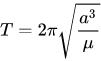     


Where  a=semi-major axis , T=period and  μ=MG with M=Mass of star and G=Gravity cte 



<center>$ T ∝ a^{3/2} $

In [3]:
planetsDf[['pl_orbsmax','pl_orbper']].corr()

,pl_orbsmax,pl_orbper
pl_orbsmax,1.000000,0.815671
pl_orbper,0.815671,1.000000


Whith scatter representacion can be observed that correlation value is affected by Oph 11 exoplanet outlier.

In [7]:
fig = px.scatter(x=planetsDf['pl_orbsmax'], y=planetsDf['pl_orbper'],title="Scatter")
fig.update_xaxes(range=(0,300))
fig.show()

Oph 11 is an outlier

In [8]:
planetsDf['pl_orbper'][3183]=np.nan

<ipython-input-8-43733eaf8250>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
planetsDf[['pl_orbsmax','pl_orbper']].corr()

,pl_orbsmax,pl_orbper
pl_orbsmax,1.000000,0.965909
pl_orbper,0.965909,1.000000


In [10]:
fig = px.scatter(planetsDf,x='pl_orbsmax', y='pl_orbper',title="Discovered Exoplanets")
fig.update_xaxes(range=(0,200))
fig.show()

# Error theory aproximation for planets with stars of known mass:


Applying the theory described at the beginning here is calculated the approximate result of the extrasolar planet's orbital period. 

# $ T \approx \sqrt{\frac{a^3}{ \frac{GM}{4 \pi^2}}}\  $ 
With a=semi-major axis , M=Mass of star and G=Gravity

a = 'pl_orbsmax'

M = 'st_mass' is the mass star in solar masses.

4434075.792 is a factor to use solar masses and UA units

In [11]:
planetsDf=planetsDf[planetsDf['st_mass'].notnull()] #Erase data without star mass stimation
theorPeriod=np.power(planetsDf['pl_orbsmax'],3/2)/np.power(6.674E-11*(planetsDf['st_mass'])*4434075.792/(4*(np.power(np.pi,2))),1/2)
theorPeriod[planetsDf['pl_orbper'].isnull()]=np.nan
planetsDf['theorPeriod']=theorPeriod

In [12]:
data0 = go.Scatter(x=planetsDf['pl_orbsmax'], y=planetsDf['pl_orbper'], mode = 'markers', name='Measures')
data1 = go.Scatter(x=planetsDf['pl_orbsmax'], y=planetsDf['theorPeriod'], mode = 'markers', name='Theory')
data = [data0, data1]
layout = go.Layout(title='Observation Vs. Aproximation')
fig = go.Figure(data= data, layout = layout)
fig.update_xaxes(range=(0,200))
fig.show()
#pyo.plot(fig, filename = 'line_chart.html')

El error cuadrático medio es:

In [13]:
((planetsDf['pl_orbper']-planetsDf['theorPeriod'])**2).mean()

721093.6716320177

More exactly:
# $ T = \sqrt{\frac{a^3}{ \frac{G(M+m)}{4 \pi^2}}}\  $ 
With a=semi-major axis , M=Mass of star, m=mass of the planet and G=Gravity

a = 'pl_orbsmax'

M = 'st_mass' is the mass star in solar masses.

4434075.792 is a factor to use solar masses and UA units

m = 'pl_bmassj' is the planet mass in Jupiter masses  (Jupiter has $9.55·10^{-4}$ solar masses)

In [14]:
planetsDf=planetsDf[planetsDf['pl_bmassj'].notnull()] #Erase data without planet mass stimation
theorPeriod=np.power(planetsDf['pl_orbsmax'],3/2)/np.power(6.674E-11*(planetsDf['st_mass']+planetsDf['pl_bmassj']*9.55*10**-4)*4434075.792/(4*(np.power(np.pi,2))),1/2)
theorPeriod[planetsDf['pl_orbper'].isnull()]=np.nan
planetsDf['theorPeriod']=theorPeriod

In [15]:
data0 = go.Scatter(x=planetsDf['pl_orbsmax'], y=planetsDf['pl_orbper'], mode = 'markers', name='Measures')
data1 = go.Scatter(x=planetsDf['pl_orbsmax'], y=planetsDf['theorPeriod'], mode = 'markers', name='Theory')
data = [data0, data1]
layout = go.Layout(title='Observation Vs. Aproximation')
fig = go.Figure(data= data, layout = layout)
fig.update_xaxes(range=(0,100))
fig.show()
#pyo.plot(fig, filename = 'line_chart.html')

Mean squared error:

In [16]:
((planetsDf['pl_orbper']-planetsDf['theorPeriod'])**2).mean()

30708.99206598928

# Conclusion:

The observations conform to the theoretical calculation. 

# $ T = \sqrt{\frac{a^3}{ \frac{G(M+m)}{4 \pi^2}}}\  $ 
With a=semi-major axis , M=Mass of star, m=mass of the planet and G=Gravity